**Table of contents**<a id='toc0_'></a>    
1. [用pdb进行代码调试](#toc1_)    
1.1. [pdb的必要性](#toc1_1_)    
1.2. [pdb如何使用](#toc1_2_)    
2. [用cProfile进行性能分析](#toc2_)    
3. [总结](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[用pdb进行代码调试](#toc0_)
---
## 1.1. <a id='toc1_1_'></a>[pdb的必要性](#toc0_)

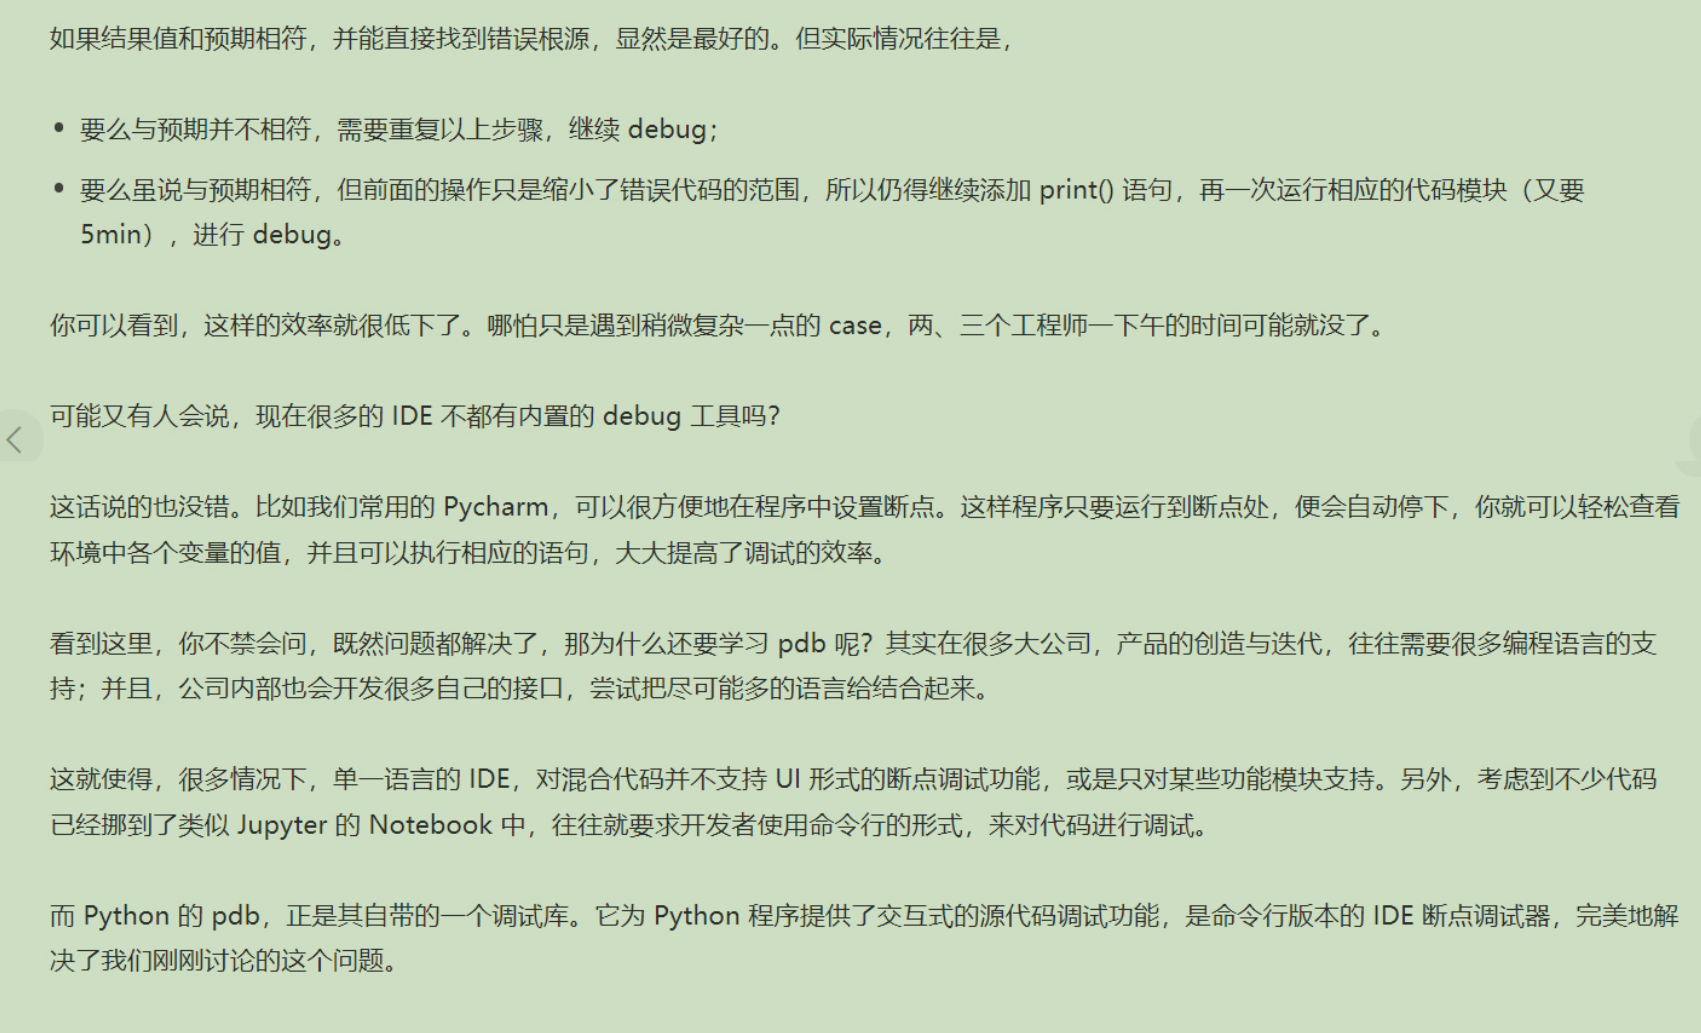

## 1.2. <a id='toc1_2_'></a>[pdb如何使用](#toc0_)

In [6]:
%%writefile .\00Pratice\02advanced\test.py
a = 1
b = 2
import pdb

pdb.set_trace()
c = 3
print(a + b + c)

Writing .\00Pratice\02advanced\test.py


In [7]:
%%writefile .\00Pratice\02advanced\test.py
def func():
    print("enter func()")

a = 1
b = 2
import pdb
pdb.set_trace()
func()
c = 3
print(a + b + c)

Overwriting .\00Pratice\02advanced\test.py


    > d:\study\vsworkspace\study_python\00pratice\02advanced\test.py(8)<module>()
    -> func()
    (Pdb) s
    --Call--
    > d:\study\vsworkspace\study_python\00pratice\02advanced\test.py(1)func()
    -> def func():
    (Pdb) l
      1  -> def func():
      2         print("enter func()")
      3
      4     a = 1
      5     b = 2
      6     import pdb
      7     pdb.set_trace()
      8     func()
      9     c = 3
    10     print(a + b + c)
    [EOF]
    (Pdb) n 
    > d:\study\vsworkspace\study_python\00pratice\02advanced\test.py(2)func()
    -> print("enter func()")
    (Pdb) n
    enter func()
    --Return--
    > d:\study\vsworkspace\study_python\00pratice\02advanced\test.py(2)func()->None
    -> print("enter func()")
    (Pdb) n
    > d:\study\vsworkspace\study_python\00pratice\02advanced\test.py(9)<module>()
    -> c = 3
    (Pdb) c
    6

# 2. <a id='toc2_'></a>[用cProfile进行性能分析](#toc0_)

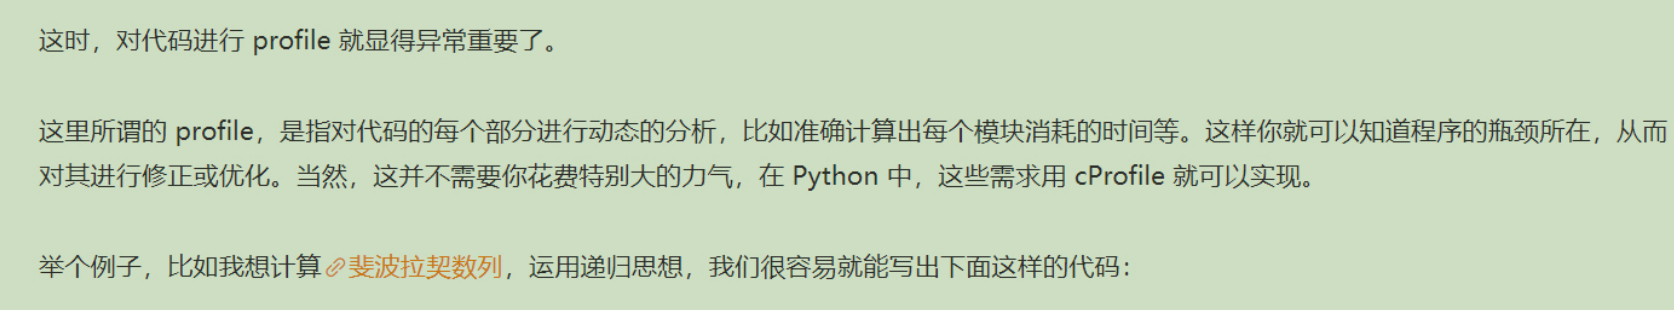

In [8]:
import cProfile
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n - 1) + fib(n - 2)


def fib_seq(n):
    res = []
    if n > 0:
        res.extend(fib_seq(n - 1))
    res.append(fib(n))
    return res


cProfile.run('fib_seq(30)')

         7049218 function calls (96 primitive calls) in 1.828 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     31/1    0.000    0.000    1.828    1.828 2969625321.py:11(fib_seq)
7049123/31    1.828    0.000    1.828    0.059 2969625321.py:2(fib)
        1    0.000    0.000    1.828    1.828 <string>:1(<module>)
        1    0.000    0.000    1.828    1.828 {built-in method builtins.exec}
       31    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
       30    0.000    0.000    0.000    0.000 {method 'extend' of 'list' objects}




优化

In [9]:
import cProfile


def memoize(f):
    memo = {}

    def helper(x):
        if x not in memo:
            memo[x] = f(x)
        return memo[x]

    return helper


@memoize
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n - 1) + fib(n - 2)


def fib_seq(n):
    res = []
    if n > 0:
        res.extend(fib_seq(n - 1))
    res.append(fib(n))
    return res


cProfile.run("fib_seq(30)")

         215 function calls (127 primitive calls) in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       31    0.000    0.000    0.000    0.000 710490332.py:15(fib)
     31/1    0.000    0.000    0.000    0.000 710490332.py:25(fib_seq)
    89/31    0.000    0.000    0.000    0.000 710490332.py:7(helper)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
       31    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
       30    0.000    0.000    0.000    0.000 {method 'extend' of 'list' objects}




# 3. <a id='toc3_'></a>[总结](#toc0_)

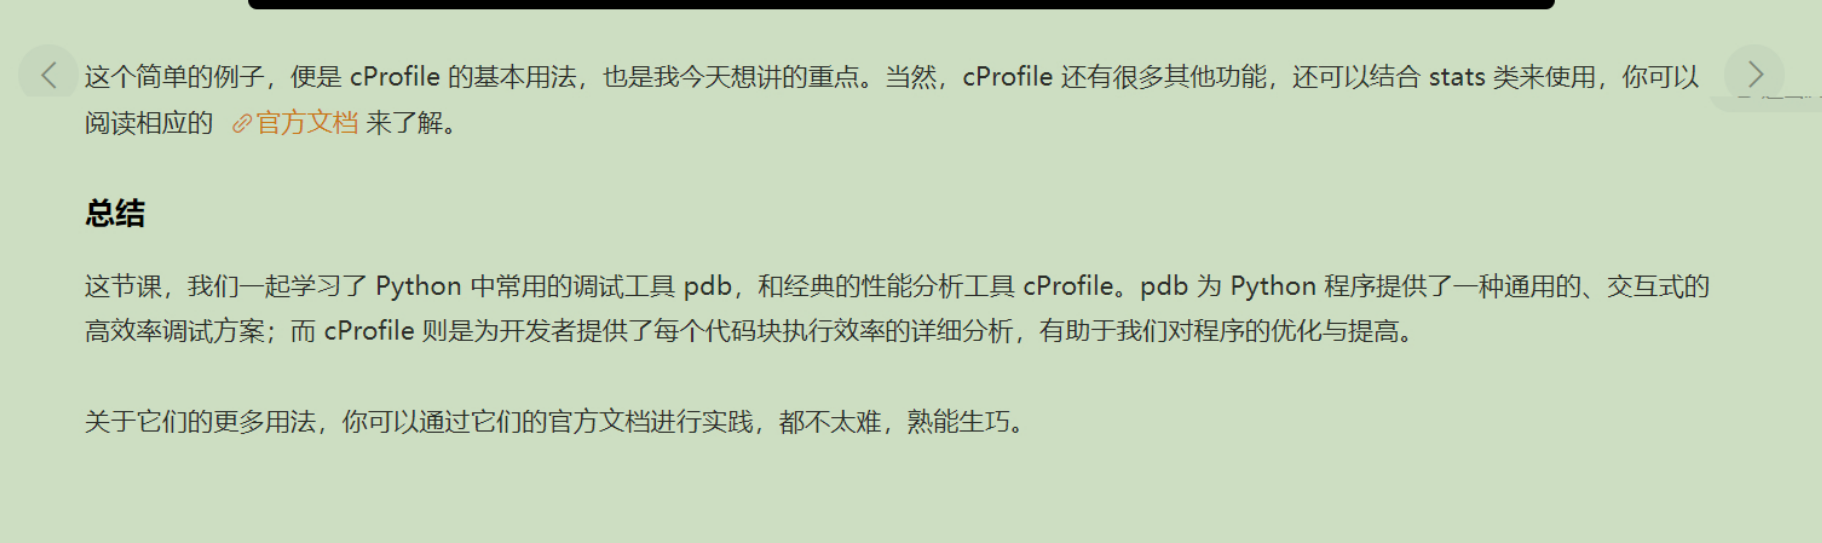